In [1]:
import os

def cleanup():
    for filename in ['ghost_burger.jpg', 'ghost_burger.png', 'street_scene_dark.jpg']:
        try:
            os.remove(filename)
        except FileNotFoundError:
            pass

os.chdir('examples')
cleanup()

# Images

In this lesson, we will learn a bit about how computers represent images, and how we can use Python to manipulate image files.

Before you start reading, it may be an interesting exercise to think about how a computer might store an image. As we learned in the [lesson on files](files.ipynb#Encodings), in order to store information computers require some system for converting that information into numbers. How might an image be converted into numbers?

As it turns out, there are a few different ways of turning an image into numbers. We will focus on the most common of these. To find out what it is, let's simply load an image into Python and explore the result. Take a look at the example image file [street_scene.jpg](examples/data/street_scene.jpg). This is the image that it contains:

![](examples/data/street_scene.jpg)

## imageio

There are a few ways to load image files into Python, but the `imageio` [package](glossary.ipynb#package) provides the simplest. (The 'io' in `imageio` stands for [input/output](glossary.ipynb#IO).)

Like all the additional Python packages that we have used so far, `imageio` is included in the default Anaconda installation, so if you installed Anaconda then you will already have it.

The `imread()` function reads an image file. The input [argument](glossary.ipynb#argument) to `imread()` is the [path](glossary.ipynb#path) to the file. As usual, we [assign](glossary.ipynb#assignment) the result into a variable so that we can work with it in the rest of our program:

In [2]:
import os
import imageio

filepath = os.path.join('data', 'street_scene.jpg')
img = imageio.imread(filepath)

## matplotlib again

After loading our image, it is a good idea to check that it has been read correctly. We can do this by displaying the image in a figure, using the `pyplot` module from `matplotlib`, which we learned about in the [lesson on arrays](arrays.ipynb#matplotlib). The function for displaying an image is `imshow()`:

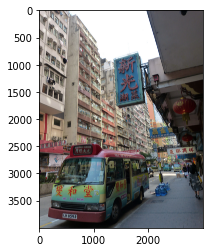

In [3]:
from matplotlib import pyplot

pyplot.imshow(img)
pyplot.show()

It looks right. The `matplotlib` figure also helpfully adds axis scales, so we can see the dimensions of our image here as well. It appears to be about 3000 pixels wide and 4000 pixels high.

When we carry out various manipulations of our image, we can keep returning to `imshow()` to check the results.

## Images as arrays

Now let's find out what form our image takes in Python. What sort of [return value](glossary.ipynb#return) did `imread()` give us?

The first thing we can do to find out is print the image variable:

In [4]:
print(img)

[[[217 208 209]
  [216 207 208]
  [215 206 207]
  ...
  [ 76  71  75]
  [ 82  77  81]
  [ 85  79  83]]

 [[217 208 209]
  [216 207 208]
  [216 207 208]
  ...
  [ 77  72  76]
  [ 82  77  81]
  [ 84  78  82]]

 [[217 209 207]
  [217 209 207]
  [218 210 208]
  ...
  [ 79  74  78]
  [ 83  78  82]
  [ 84  78  82]]

 ...

 [[171 163 117]
  [168 161 117]
  [162 155 113]
  ...
  [ 69  75  87]
  [ 72  76  88]
  [ 75  78  93]]

 [[162 157 115]
  [159 154 112]
  [154 149 111]
  ...
  [ 69  75  87]
  [ 71  75  87]
  [ 75  78  93]]

 [[149 144 104]
  [148 145 104]
  [147 143 106]
  ...
  [ 68  75  85]
  [ 72  76  88]
  [ 76  79  94]]]


This looks a lot like an [array](glossary.ipynb#array). And indeed it is; our image has been turned into an array. Quite a big one (the occurrences of '...' in the printed output indicate that some of the contents have been omitted so that the printout is of a manageable size).

Let's check its [type](glossary.ipynb#type) just to be sure:

In [5]:
type(img)

imageio.core.util.Array

We are told that it is an `imageio` array rather than a `numpy` array, but this distinction need not concern us. `imaegio`'s array type is a variation on `numpy`'s, and everything that we learned about `numpy` arrays in the [lesson on arrays](arrays.ipynb) also applies to our image array.

For example, the image array has a `shape` [attribute](glossary.ipynb#attribute):

In [6]:
img.shape

(4000, 3000, 3)

What does the `shape` attribute tell us about our image array?

First of all, we can see from the fact that `shape` contains three numbers that the array has three dimensions. This does not mean that our image is a 3D image; it is a normal 'flat' 2D image. Let's see what each of the dimensions of the array refers to.

The first two dimensions are easy to understand. We can think of these as rows and columns, just as in a [matrix](glossary.ipynb#matrix). Remembering Python's convention for ordering the dimensions of an array, we can see that our image array has 4000 rows and 3000 columns. And looking back at the `imshow()` figure of the image above, we can see that these two numbers match the height and width of the image in pixels. So together the first two dimensions represent the image as a matrix of pixels.

Array indices count rows downwards from the top and count columns from left to right. So if we ask for the first row and the first column (using array [indices](glossary.ipynb#index) as we learned in [the previous lesson](arrays.ipynb#indexing)), we get the top left pixel:

In [7]:
print(img[0, 0])

[217 208 209]


### RGB

The three numbers that we see here are the three values along the remaining dimension of the array. For mental visualization, it can help to think of the third dimension as representing 'layers', so that the image is composed of three matrices of pixels, stacked one on top of the other.

Each of these three layers represents one color, and the image is made up of the [additive mixture](https://en.wikipedia.org/wiki/Additive_color) of these three color layers. The most common system for representing color mixtures in computing is with the three primary colors red, green, and blue, in that order. These mix together in the same way that you probably learned about at school:

* red + green -> yellow
* red + blue -> pinkish purple (magenta)
* green + blue -> greenish blue (cyan)
* red + green + blue -> white

Here is a fun [home-made video](https://upload.wikimedia.org/wikipedia/commons/transcoded/3/3d/Additive_colors.ogv/Additive_colors.ogv.480p.vp9.webm) demonstrating additive color mixing.

A sequence of three numbers representing a color as a mixture of red, green, and blue is known as an [RGB](glossary.ipynb#RGB) value. So the three layers of our image array are a red layer, a green layer, and a blue layer. And the three numbers that we saw in the top left pixel above are the 'amounts' of red, green, and blue in the color of this single pixel. What scale are these numbers on? Most commonly, RGB values are integers on a scale from 0 to 255, where larger numbers represent more of a particular color, and therefore a brighter color. Other color scales are possible, but this one is the most common and the one that is used in our image array.

So what color is the top left pixel of our image? It contains approximately equal amounts of all three colors, which should produce a neutral gray. And those amounts are fairly close to the maximum value of 255, so the gray should be a fairly bright one. Looking back at the image, this matches what we see; the top left of the image contains the facade of a light gray concrete building.

We can see that the top right of the image contains a rather darker gray, so we should expect lower values here. Let's check our understanding by fetching this pixel (remember that negative [indices](glossary.ipynb#index) count back from the end):

In [8]:
print(img[0, -1])

[85 79 83]


If you want to experiment with RGB values to find out what sorts of colors result from different combinations, you can create your own small image arrays using `numpy` and then show the result with `imshow()`. The `numpy` function `full()` is useful for creating arrays of a given shape that are full of the same value. The first input argument is the desired shape, and the second is the value to fill the array with.

For example, we can use `full()` to create a small image array of 10 by 10 pixels in which all pixels are black:

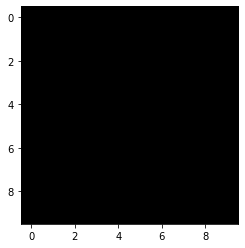

In [9]:
import numpy

color_test = numpy.full((10, 10, 3), 0)
pyplot.imshow(color_test)
pyplot.show()

And now to try out other colors, we can use [array indexing](arrays.ipynb#indexing) to change the values in one or more of the color layers in our new image array. For example to see what the combination of red and green looks like, we can set the first two color layers (R and G) to the maximum value of `255`:

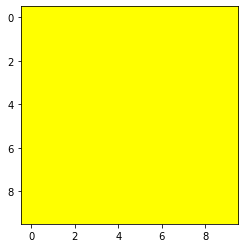

In [10]:
color_test[:, :, 0:2] = 255
pyplot.imshow(color_test)
pyplot.show()

#### Manipulating colors

We can use our understanding of RGB values to manipulate the colors of our example image.

This will involve changing the values in the image array. To avoid having to load the image from the file again every time we want to start afresh, we can begin each new manipulation by making a copy of the image array, so that the original remains unchanged. `numpy` arrays have a `copy()` [method](glossary.ipynb#method) for this:

In [11]:
img_mod = img.copy()

Now we can work with the copy. Let's try first 'turning off' the red and green color layers by setting all their values to `0`. This should result in an image that contains only shades of blue:

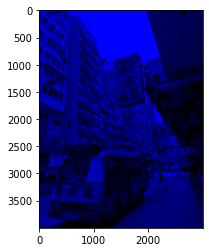

In [12]:
img_mod[:, :, 0:2] = 0

pyplot.imshow(img_mod)
pyplot.show()

Turning one color layer up to maximum while leaving the other layers unchanged instead results in a 'tint':

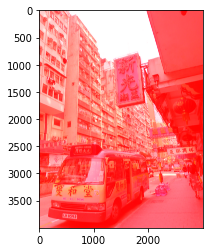

In [13]:
img_mod = img.copy()

img_mod[:, :, 0] = 255

pyplot.imshow(img_mod)
pyplot.show()

And changing a subset of rows or columns instead of asking for all of them (with `:`) applies the color change to only some of the pixels:

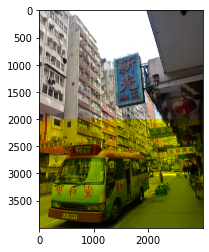

In [14]:
img_mod = img.copy()

img_mod[-2000:, :, 2] = 0

pyplot.imshow(img_mod)
pyplot.show()

You get the general idea. Now is a good moment to head over to the Spyder console, load the image yourself if you haven't already, and try out some more color manipulations to test your understanding.

### uint8

Like a `numpy` array, an `imageio` array has a `dtype` [attribute](glossary.ipynb#attribute). If you have been paying attention to the outputs that we printed above, you will have noticed that the values in our image array are integers (note the absence of a decimal point). Let's check the array's `dtype` to be sure:

In [15]:
img.dtype

dtype('uint8')

The values in the image array are of [type](glossary.ipynb#type) 'uint8' rather than just 'int'. They are still integers, but of a special restricted kind. The `uint8` type is a new one that comes from `numpy` rather than from basic Python.

To illustrate the special behavior of this type, let's create a small `numpy` array, and specifically request that its `dtype` be `uint8`:

In [16]:
x = numpy.array([[1, 2], [3, 4]], dtype=numpy.uint8)

If we print our new array, its values look just like normal integers. And if we do some basic math with them, they also appear to behave normally:

In [17]:
print(x)

[[1 2]
 [3 4]]


In [18]:
print(x + 1)

[[2 3]
 [4 5]]


In [19]:
print(x * 2)

[[2 4]
 [6 8]]


However, the `uint8` type has two special characteristics that make it different from a standard Python `int`.

First, the 'u' in 'uint8' stands for 'unsigned'. A `uint8` number has no sign, i.e. it cannot be negative. If we do something with an array of `uint8` values that would make some of those values negative, the result is not as expected:

In [20]:
print(x - 5)

[[252 253]
 [254 255]]


To understand why `4 - 5` appears to result in `255`, consider the second special characteristic of `uint8`. The '8' at the end stands for '8-bit', and refers to the representation of the integers in the computer's memory as sequences of 'on/off' 'bits', which is ultimately how all numbers are represented in a computer. The computer stores `uint8` numbers using only 8 such bits for each number. As it turns out, 255 is the largest number that can be represented as a combination of 8 bits. Since each bit has two possible values (either 'on' or 'off'), the number of possible combinations of ons and offs among 8 bits is $2^8$:

In [21]:
2 ** 8

256

(If you are wondering why the largest possible number is only 255 when the number of possible combinations is 256, remember that the number 0 is among the possible numbers as well.)

Unsigned 8-bit integers are a decent choice for representing the color values of an image. 8 bits is a small amount of computer memory, so the image can be stored compactly, and 256 possible values for each of the three color layers still results in a large range of possible overall colors:

In [22]:
256 ** 3

16777216

So `uint8` values cannot become negative and cannot go above 255. If we perform mathematical operations with an array of `uint8` values such that they go beyond this range, they are 'wrapped around' to the other end of the range. This is why `4 - 5` became `255`. Likewise, `1 + 255` becomes `0`:

In [23]:
print(x + 255)

[[0 1]
 [2 3]]


In practical terms, what this means for us is that we should be careful when doing math with image arrays. If a math operation could take the values outside the range 0 to 255, then the results might be unexpected.

One other common problem arises if we accidentally convert the values in the image array to a different type. As we learned way back in the [lesson on types](types.ipynb), division always results in a [float](glossary.ipynb#float). So if we try to divide values, for example in an attempt to darken the image by making all color values less bright, the resulting array's `dtype` will be float:

In [24]:
img2 = img / 2

img2.dtype

dtype('float64')

And `imshow()` by default interprets arrays of floats in an entirely different way to integers, so the resulting image does not look right at all (though we at least get a warning message telling us that there are invalid values in the array):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


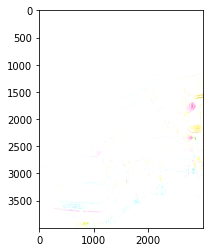

In [25]:
pyplot.imshow(img2)
pyplot.show()

To darken the image correctly, we can use integer division (`//`) instead:

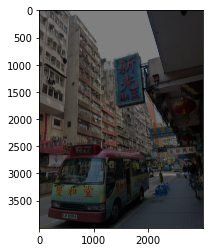

In [26]:
pyplot.imshow(img // 2)
pyplot.show()

## Writing images

We will of course sometimes want to save our modified image arrays to a new image file. `imageio` makes this easy. All we need is to supply a new file name to the `imwrite()` function, along with an image array.

Let's save the dark version of our image as an example:

In [27]:
imageio.imwrite('street_scene_dark.jpg', img // 2)

You can go to your file explorer after trying out the `imwrite()` command with some more modified image arrays and see what the finished images look like.

## Transparency

Let's load another example image, [hamburger_emoji.png](examples/data/hamburger_emoji.png). This file contains Google's notorious implementation of the hamburger/cheeseburger emoji for Android phones, in which the cheese slice controversially appears below the meat patty rather than on top of it (though Google has since [fixed this](https://blog.emojipedia.org/google-fixes-burger-emoji)). It looks like this:

![](examples/data/hamburger_emoji.png)

Cheeseburger etiquette is not what concerns us here. Instead it is the format of the image file. Our first example image was a *jpeg*, a very popular image format for photographs. Probably most of the photos in your holiday pics folder will be *jpeg* files. The hamburger emoji file is instead a *png* image. *png* is probably the second most popular image format. It is used mainly for the internet and for the icons, logos, etc in apps. There are various important differences between the two formats, but the one we will look at here is the fact that *png* files, but not *jpeg* files, allow parts of an image to be transparent.

Take a look at the hamburger image above. It appears not to be rectangular like the street scene image, but to have the shape of a hamburger. This is not because the image file actually has this shape; behind the scenes, it still contains information about a rectangular array of pixels. Rather, some of the pixels in the image are 'transparent', i.e. they allow whatever is behind the image to show through. If you open up a word processing document and paste the hamburger image file in over the top of some text, you will see that the text shows through the transparent parts of the image around the hamburger. And if you open the image file in your image viewer, you may see something like this, depending on what your default image viewer application is:

![](images/transparency.png)

Many image viewing programs use the gray checkerboard pattern as a means of indicating transparency.

Now let's see how transparency is represented in an image array when we load a *png* file with `imageio`:

In [28]:
filepath = os.path.join('data', 'hamburger_emoji.png')
burger_img = imageio.imread(filepath)

burger_img.shape

(160, 160, 4)

The first two values in the `shape` attribute confirm that the hamburger image is still a rectangular array of pixels. It is 160 pixels high and 160 pixels wide. But the third value indicates that the image array has four 'color layers', not three.

The first three color layers still store the [RGB](glossary.ipynb#RGB) values for each pixel, as we learned above. The numbers in the additional layer indicate how transparent each pixel should be. Or more accurately, these values actually indicate how *opaque* each pixel should be, since lower values make pixels more transparent and higher values make them less transparent. Often this 'opacity layer' of an image array is referred to as the image's '[alpha channel](https://en.wikipedia.org/wiki/Alpha_compositing)'.

The data type of the image array is still `uint8`, so the scale of the alpha channel is 0 to 255, the same as for the color values.

Consider the top left pixel of the hamburger image array, where the image is completely transparent:

In [29]:
print(burger_img[0, 0])

[0 0 0 0]


Here, the color values are zero. But more importantly the fourth number, the alpha channel, is also zero, making the image completely transparent here. (In fact, if this value is zero then the values of the color layers are irrelevant, since a completely transparent pixel is invisible anyway).

Compare a pixel from the center of the image:

In [30]:
print(burger_img[80, 80])

[111 171  41 255]


Here the alpha channel is at maximum (255), so the image is not transparent at all.

All of the alpha values in this image array happen to be either `0` or `255`. This is fairly common for logos and icons, since we usually want these to be completely opaque except outside the outline of the logo or icon. But intermediate values are also possible, making the background show through more faintly:

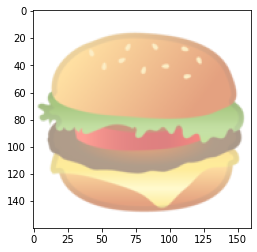

In [31]:
ghost_burger_img = burger_img.copy()
ghost_burger_img[:, :, 3] = ghost_burger_img[:, :, 3] // 2

pyplot.imshow(ghost_burger_img)
pyplot.show()

You can try saving a partly transparent image and then copying it into a word processing document over some text. You should see that the text shows through the image faintly:

In [32]:
imageio.imwrite('ghost_burger.png', ghost_burger_img)

Make sure that you ask for a *png*  file if you are saving an image with transparency, as the *jpeg* file format does not include any way of encoding transparency:

In [33]:
imageio.imwrite('ghost_burger.jpg', ghost_burger_img)

OSError: JPEG does not support alpha channel.

## Image processing

We have covered here the very, very basics of a field of computing known as 'image processing' or sometimes 'digital image processing'. There is lots more to this field, and it has many exciting applications such as automatic recognition of objects in images, detecting whether a photograph has been manipulated with software like photoshop, or automatically blurring out the face of your ex-partner from all your holiday pictures.

We will finish with a very brief look ahead to what else is possible in image processing with Python.

### scikit-image

The image manipulations we carried out above involved only very simple array operations, just basic arithmetic with subsets of the image array's values. The sort of operations necessary for a task like finding the edges of an object or detecting Photoshop effects are considerably more complex. Although it may be a fun exercise to try to re-implement some of these ourselves, it would be very tedious, and we would probably make some mistakes. As with most common tasks in Python, your first question about image processing should be: Is there a [package](glossary.ipynb#package) already out there that does what I need?

For image processing, the answer is a definite yes. The popular 'scikit-image' package, part of the larger 'scikit' bundle of packages for scientific applications in Python, provides ready-made functions implementing a lot of useful image processing algorithms. And 'scikit-image' is also part of the default Anaconda installation.

Let's import it. Since names in Python cannot contain hyphens, within Python scikit-image is actually called `skimage` (which is coincidentally also the name of a new character class in popular alpine version of Dungeons and Dragons). It is a big package, containing several modules. We will look at just two of these:

* `color`: For working with colors.
* `feature`: For detecting features in an image.
* `transform`: Various ways of altering an image, like in Photoshop, only more sciency.

In [34]:
from skimage import color, feature, transform

#### Grayscale

The `color` module provides functions for working with colors, including for some of the things we did 'by hand' above. One of the most useful is conversion from color to [grayscale](glossary.ipynb#grayscale). Let's try it out for our street scene image:

In [35]:
img_gray = color.rgb2gray(img)

The resulting array has only two dimensions, because gray pixels do not require separation into three color layers; one number for each pixel is enough to represent the lightness of the gray in that pixel:

In [36]:
img_gray.shape

(4000, 3000)

##### Color maps

Something looks a bit wrong if we try to display the gray image array with `imshow()`:

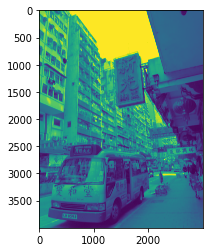

In [37]:
pyplot.imshow(img_gray)
pyplot.show()

This is because of the default behavior of `pyplot`. `pyplot` turns image arrays into figures using the same system that it uses for plotting data in general. When plotting data, it often makes sense to use a color scale that ranges fro one color to another. For example, when plotting brain activity, scientists might show values along a color scale ranging from deep red for low values to bright yellow for high values, like this:

![](images/salmon.png)

(Image source: [Neural correlates of interspecies perspective taking in the post-mortem Atlantic Salmon](https://doi.org/10.1016/S1053-8119(09)71202-9))

Turning numbers into colors is sometimes termed 'mapping' those number to colors, and a scale that gradually changes color from low to high numbers is called a 'color map'. `pyplot`'s default color map for single numbers is one that is designed for displaying scientific data like brain activity or air temperature. It maps low values to a dark blue and high values to yellow, which makes them visually easy to distinguish. So when we give `pyplot()` a matrix of single numbers, it 'thinks' that these represent scientific data rather than a gray image, and so it applies this blue-to-yellow color map (which is called '[viridis](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html#introduction)').

The viridis color map is not really appropriate for our grayscale image. We would rather just have a boring dark-to-light gray color map. The `cm` module in `pyplot` provides various alternative color maps. We want the one called `gray`. We can give this as the `cmap` [argument](glossary.ipynb#argument) to `imshow()`:

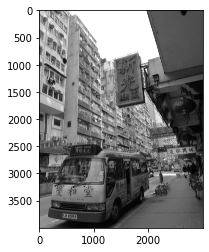

In [38]:
pyplot.imshow(img_gray, cmap=pyplot.cm.gray)
pyplot.show()

Better.

Converting images to grayscale is useful not just for making your holiday photos look classier. Many image processing algorithms can only operate on grayscale images, and have no straightforward way of dealing with colors. So for some tasks, our first step will be to convert our starting image from color to grayscale.

#### Edge detection

As an example of using scikit-image, let's look briefly at a common image processing task: finding the edges of objects in an image. In order to locate specific objects in an image, or to divide an image up into different regions of interest, such as foreground and background, the first step is to find the boundaries between different surfaces in the image. This is known as 'edge detection'. There are many different ways of carrying out edge detection, but in most cases the very general principle is to find parts of the image containing two adjacent groups of pixels such that the pixels in one group are all similar to each another in one way or another, but different from the other group.

One of the most successful algorithms for edge detection is the [Canny algorithm](https://en.wikipedia.org/wiki/Canny_edge_detector) (so called not in the sense of 'canny' meaning 'clever', but because its inventor happened to be called 'Canny'). There is a function for it in scikit-image's `feature` module.

Let's try it out. Since the algorithm is computationally quite intensive and requires some preprocessing for complex images, we will try it just on the simple hamburger image:

In [45]:
burger_edges = feature.canny(color.rgb2gray(color.rgba2rgb(burger_img)))

The result is a new version of the image array in which every pixel is a [boolean](glossary.ipynb#boolean) value indicating whether that pixel is at the edge of a region of the image (`True`) or inside a region of the image (`False`):

In [40]:
burger_edges.dtype

dtype('bool')

`pyplot` shows boolean values black for `False` and white for `True`:

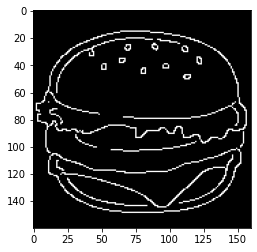

In [41]:
pyplot.imshow(burger_edges, cmap=pyplot.cm.gray)
pyplot.show()

Note that we had to first convert the hamburger to grayscale, using two conversion functions:

* `rgba2rgb` gets rid of any transparency ('alpha') layer in the image array, so that it has just the three layers 'red', 'green', and 'blue'.
* `rgb2gray` converts a color image to a gray image with only one layer representing the shade of gray.

Like many image processing functions, `canny()` has no default way of handling color image arrays:

In [42]:
feature.canny(burger_img)

ValueError: The parameter `image` must be a 2-dimensional array

#### Transformations

To finish, let's try out a transformation, just for fun. The `swirl()` function distorts the image by swirling pixels. The [arguments](glossary.ipynb#argument) `strength` and `radius` control how 'swirly' the swirl is, and how far across the image it extends (in pixels), respectively:

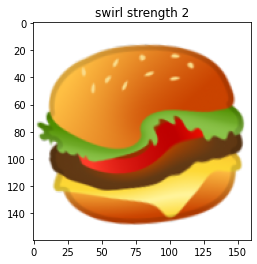

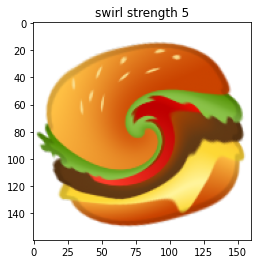

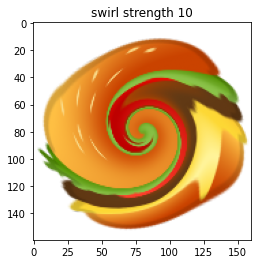

In [43]:
for s in [2, 5, 10]:
    pyplot.imshow(transform.swirl(burger_img, strength=s, radius=160))
    pyplot.title('swirl strength {}'.format(s))
    pyplot.show()

That's it for image processing. You can read many more examples at the [scikit-image examples gallery](https://scikit-image.org/docs/stable/auto_examples).

## Exercise

In colloquial English, to view the world through 'rose-tinted glasses' means to interpret everything optimistically. Write a function called `rose_tint()` to help people see the world this way.

The function should take the name of an image file as its input argument. It then saves a new version of the image, which has been given a pinkish tint to make everything look pretty. The new image file should be called *rosy_* followed by the name of the original image file.

Note that this function has no [return value](glossary.ipynb); it writes a new file, but does not return any value that can be assigned into a variable.

You may need to experiment with [RGB](glossary.ipynb#RGB) values to find a good general way of tinting an image array pink. You can also test your function with an example image to check the result as you work on it.

In [44]:
cleanup()